## Sentiment Analysis 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("stock_data.csv")

In [2]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB 1.4 MB/s eta 0:03:29
                                              0.1/284.2 MB 1.4 MB/s eta 0:03:17
                                              0.3/284.2 MB 2.7 MB/s eta 0:01:45
                                              0.8/284.2 MB 4.3 MB/s eta 0:01:06
                                              1.1/284.2 MB 5.5 MB/s eta 0:00:52
                                              1.7/284.2 MB 6.4 MB/s eta 0:00:45
                                              2.3/284.2 MB 7.4 MB/s eta 0:00:39
                                              2.8/284.2 MB 7.8 MB/s eta 0:00:37
                                              3.4/284.2 MB 8.4 MB/s eta 0:00:34
                                              4.0/284.2 MB 8.8 MB/s eta 0:00:32
                                              4.5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
df.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [11]:
df.columns

Index(['Text', 'Sentiment'], dtype='object')

In [12]:
tweet_df = df[['Text','Sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [13]:
tweet_df = tweet_df[tweet_df['Sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(10)

(5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [14]:
tweet_df["Sentiment"].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [15]:
sentiment_label = tweet_df.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Int64Index([1, -1], dtype='int64'))

In [16]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [17]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'a': 3, 'on': 4, 'in': 5, 'of': 6, 'for': 7, 'aap': 8, 'and': 9, 'is': 10, 't': 11, 'co': 12, 'https': 13, 'user': 14, 'at': 15, 'it': 16, 'this': 17, 'i': 18, 'short': 19, 'up': 20, 'will': 21, 'from': 22, 'over': 23, 'with': 24, 'here': 25, 'be': 26, '1': 27, 'today': 28, 'out': 29, 'as': 30, 'volume': 31, '2': 32, 'that': 33, 'day': 34, 'like': 35, 'are': 36, 'but': 37, 'long': 38, 'if': 39, '50': 40, 'now': 41, '3': 42, 'not': 43, 'good': 44, 'stock': 45, 'has': 46, 'you': 47, 'my': 48, 'more': 49, 'goog': 50, 'some': 51, 'above': 52, 'watch': 53, 'new': 54, 'bac': 55, 'down': 56, 'stop': 57, 'still': 58, 'have': 59, 'nice': 60, '5': 61, 'back': 62, 'buy': 63, 'after': 64, 'next': 65, 'move': 66, 'higher': 67, 'coronavirus': 68, 'market': 69, '4': 70, 'we': 71, 'by': 72, '10': 73, 'time': 74, 'off': 75, 'all': 76, 'so': 77, 'no': 78, 'see': 79, 'just': 80, 'ong': 81, 'an': 82, 'one': 83, 'week': 84, '8': 85, 'sensex': 86, 'or': 87, 'triangle': 88, 'trade': 89, '

In [18]:
print(tweet[0])
print(encoded_docs[0])

Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts
[4613, 4, 48, 443, 3254, 4614, 4615, 4616, 3255, 4617, 1453, 89, 3256, 27, 87, 3256, 32, 79, 2147, 2562]


In [19]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 4613    4
   48  443 3254 4614 4615 4616 3255 4617 1453   89 3256   27   87 3256
   32 

In [20]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           326016    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 342667 (1.31 MB)
Trainable params: 342667 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [21]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
145/145 [==============================] - 23s 130ms/step - loss: 0.6276 - accuracy: 0.6753 - val_loss: 0.7724 - val_accuracy: 0.4754
Epoch 2/5
145/145 [==============================] - 17s 117ms/step - loss: 0.4810 - accuracy: 0.7679 - val_loss: 0.7309 - val_accuracy: 0.5660
Epoch 3/5
145/145 [==============================] - 17s 119ms/step - loss: 0.3381 - accuracy: 0.8577 - val_loss: 0.7582 - val_accuracy: 0.5850
Epoch 4/5
145/145 [==============================] - 18s 122ms/step - loss: 0.2785 - accuracy: 0.8882 - val_loss: 0.8512 - val_accuracy: 0.6005
Epoch 5/5
145/145 [==============================] - 18s 126ms/step - loss: 0.2348 - accuracy: 0.9113 - val_loss: 0.7945 - val_accuracy: 0.6273


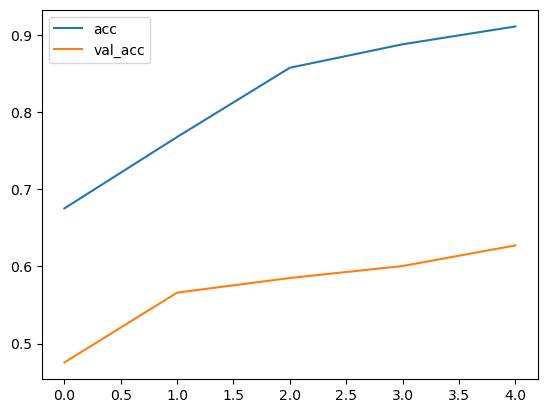

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

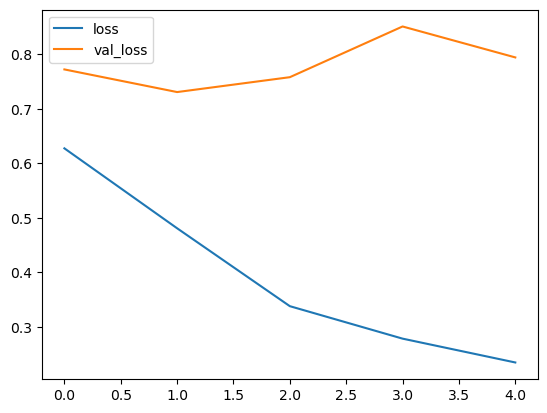

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [24]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [25]:
test_sentence1 = "Market is going up."
predict_sentiment(test_sentence1)

test_sentence2 = "current downtrend"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 263ms/step
Predicted label:  1
1/1 [==============================] - 0s 28ms/step
Predicted label:  -1
